In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [4]:
df = pd.read_csv(r"D:\Time_Series\Time_Series_Analysis\data\AirPassengers.csv")

df.head()

,Month,Passengers
0,15-01-1949,112
1,15-02-1949,118
2,15-03-1949,132
3,15-04-1949,129
4,15-05-1949,121


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Month       144 non-null    object
 1   Passengers  144 non-null    int64 
dtypes: int64(1), object(1)
memory usage: 2.4+ KB


In [6]:
df.describe()

,Passengers
count,144.000000
mean,280.298611
std,119.966317
min,104.000000
25%,180.000000
50%,265.500000
75%,360.500000
max,622.000000


In [8]:
df = df.set_index('Month')
df.head()

,Passengers
Month,
15-01-1949,112
15-02-1949,118
15-03-1949,132
15-04-1949,129
15-05-1949,121


# Visualize the time series

### Check for trend, seasonality or random patterns

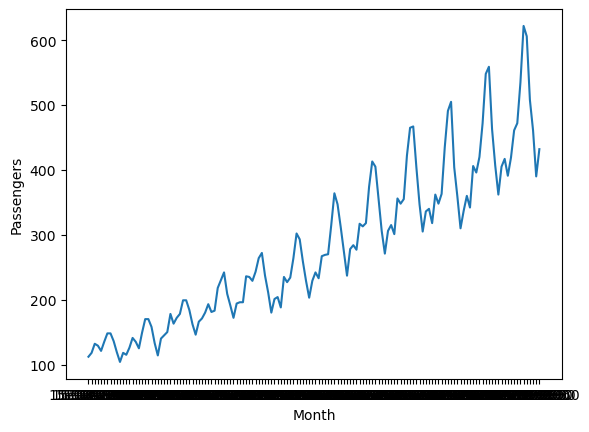

In [9]:
sns.lineplot(x=df.index, y = df['Passengers'])
plt.show()

# Check for statinority

## Method - 1 Rolling Statistics

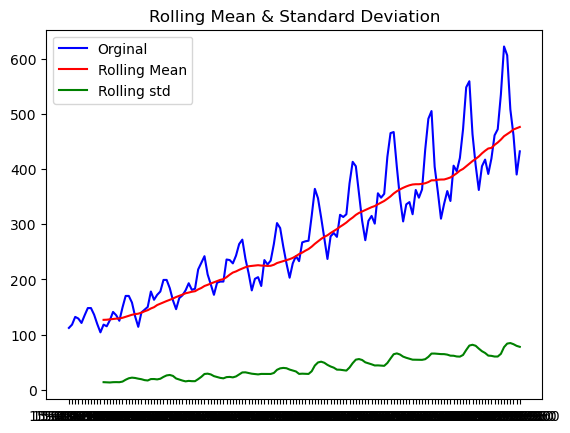

In [15]:
rolmen = df['Passengers'].rolling(window=12).mean()
rolstd = df['Passengers'].rolling(window=12).std()

#plot
orig = plt.plot(df['Passengers'], color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=df.index)
plt.legend ()
plt.show()

### Method 2 Augmented Dicky Fuller Test

#### For ADF Test
H0 : Data is not-stationary
H1 : Data is stationary

based on pvalue, we accept or reject H0 (if p-value < 5% reject null hypothesis>)

In [12]:
from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(df['Passengers'])
adfuller_result

(0.8153688792060543,
 0.9918802434376411,
 13,
 130,
 {'1%': -3.4816817173418295,
  '5%': -2.8840418343195267,
  '10%': -2.578770059171598},
 996.692930839019)

In [13]:
print('p-value: ', adfuller_result[1])

p-value:  0.9918802434376411


In [14]:
from statsmodels.tsa.stattools import adfuller

# Assuming df['Passengers'] is your time series data
adfuller_result = adfuller(df['Passengers'])

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Test Statistic:  0.8153688792060543
p-value:  0.9918802434376411
Number of Lags Used:  13
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is not stationary.


## Covert data to stationary

In [16]:
#apply differencing

diff = df['Passengers'] - df['Passengers'].shift(1)

diff

Month
15-01-1949     NaN
15-02-1949     6.0
15-03-1949    14.0
15-04-1949    -3.0
15-05-1949    -8.0
              ... 
15-08-1960   -16.0
15-09-1960   -98.0
15-10-1960   -47.0
15-11-1960   -71.0
15-12-1960    42.0
Name: Passengers, Length: 144, dtype: float64

In [18]:
diff.dropna(inplace=True)

In [20]:
diff.head()

Month
15-02-1949     6.0
15-03-1949    14.0
15-04-1949    -3.0
15-05-1949    -8.0
15-06-1949    14.0
Name: Passengers, dtype: float64

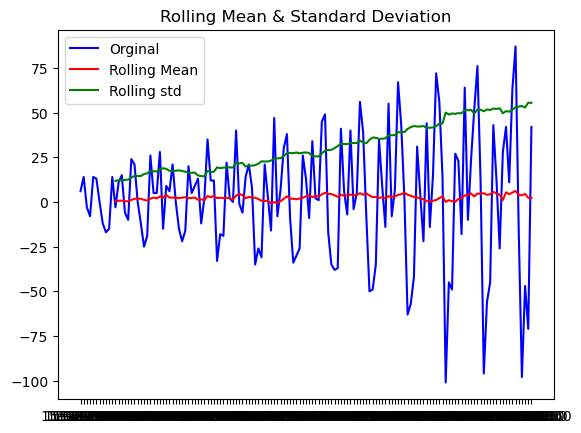

In [31]:
rolmen = diff.rolling(window=12).mean()
rolstd = diff.rolling(window=12).std()

#plot
orig = plt.plot(diff, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff.index)
plt.legend ()
plt.show()

In [26]:
adfuller_result = adfuller(diff)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")


ADF Test Statistic:  -2.8292668241700034
p-value:  0.054213290283824954
Number of Lags Used:  12
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is not stationary.


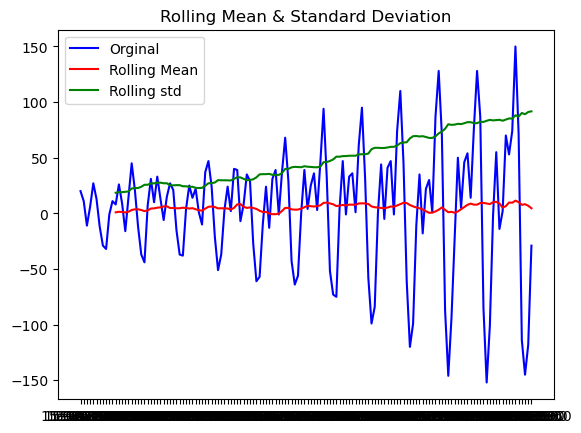

ADF Test Statistic:  -2.9616951355554337
p-value:  0.03862975767698741
Number of Lags Used:  11
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is stationary.


In [35]:
#apply differencing step 2 

diff1 = df['Passengers'] - df['Passengers'].shift(2)

diff1.dropna(inplace=True)
rolmen = diff1.rolling(window=12).mean()
rolstd = diff1.rolling(window=12).std()

#plot
orig = plt.plot(diff1, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff1.index)
plt.legend ()
plt.show()


adfuller_result = adfuller(diff1)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

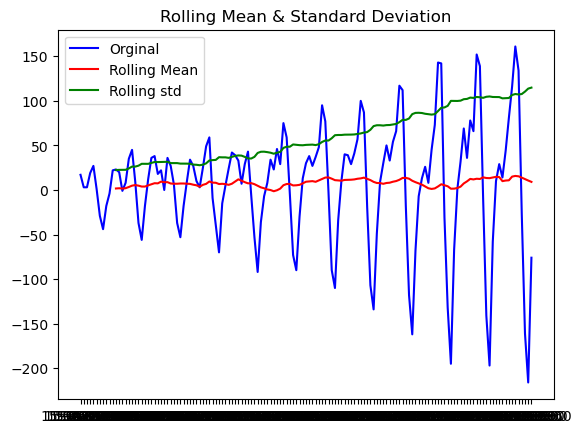

ADF Test Statistic:  -2.8865058565449706
p-value:  0.04693983572510758
Number of Lags Used:  10
Number of Observations Used:  130
Critical Values:
	1%: -3.482
	5%: -2.884
	10%: -2.579
The time series is stationary.


In [34]:
#apply differencing step 3 

diff2 = df['Passengers'] - df['Passengers'].shift(3)

diff2.dropna(inplace=True)
rolmen = diff2.rolling(window=12).mean()
rolstd = diff2.rolling(window=12).std()

#plot
orig = plt.plot(diff2, color= 'blue', label='Orginal')
mean = plt.plot(rolmen, color = 'red', label = 'Rolling Mean')
std = plt.plot(rolstd, color= 'green', label = 'Rolling std')
plt.title('Rolling Mean & Standard Deviation')
plt.xticks(ticks=diff2.index)
plt.legend ()
plt.show()


adfuller_result = adfuller(diff2)

print('ADF Test Statistic: ', adfuller_result[0])
print('p-value: ', adfuller_result[1])
print('Number of Lags Used: ', adfuller_result[2])
print('Number of Observations Used: ', adfuller_result[3])
print('Critical Values:')
for key, value in adfuller_result[4].items():
    print('\t%s: %.3f' % (key, value))

# Decision based on p-value
if adfuller_result[1] <= 0.05:
    print("The time series is stationary.")
else:
    print("The time series is not stationary.")

#### From above for step 2 have p-value - 0.038 less than 5%

In [36]:
diff1.head()

Month
15-03-1949    20.0
15-04-1949    11.0
15-05-1949   -11.0
15-06-1949     6.0
15-07-1949    27.0
Name: Passengers, dtype: float64

In [37]:
y_train = diff1[:114]
y_test = diff1[114:]

## Build ARIMA Model
### ARIMA Model is build by using p,d,q values

1. p is AR value(determined from PACF plot)
2. d is intergration
3. q is moving average (MV) determined by from ACF plot

Plot ACF/PACF and find p & q parameters
• Auto Correlation Function (ACF) 
- A function which gives us values of auto-correlation of any series with its lagged values.
  
• Partial Auto Correlation Function (PACF) 
- An indirect function to find Auto correlation after removing the relationship explained by previous lags


Time series lag example

• Original time series = (21,22,21,20,19}

• Lagged time series by 1 lag = {22,21,20,19}

• Lag 1 correlation will be correlation between {21,22,21,20} and {22,21,20,19}